In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import os
import warnings
warnings.filterwarnings('ignore')
directory = "C:\\Users\\anupa\\OneDrive\\Documents\\Maths 4\\Project\\archive"
print(os.listdir(directory))

['fruits-360-original-size', 'fruits-360_dataset']


In [46]:
np.random.seed(1234)
directory="C:\\Users\\anupa\\OneDrive\\Documents\\Maths 4\\Project\\archive\\fruits-360_dataset\\fruits-360\\Training"
classes=["Apple Golden 1","Avocado","Banana","Cherry 1","Cocos","Kiwi",
         "Lemon","Mango","Orange"]
all_arrays=[]
img_size=100
for i in classes:
    path=os.path.join(directory,i)
    class_num=classes.index(i)
    for img in os.listdir(path):
        #img_array=cv2.imread(os.path.join(path,img),
        #                     cv2.IMREAD_GRAYSCALE)
        img_array=cv2.imread(os.path.join(path,img))
        img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        #img_array=cv2.resize(img_array,(img_size,img_size))
        all_arrays.append([img_array,class_num])

In [47]:
directory2="C:\\Users\\anupa\\OneDrive\\Documents\\Maths 4\\Project\\archive\\fruits-360_dataset\\fruits-360\\Test"
classes2=["Apple Golden 1","Avocado","Banana","Cherry 1","Cocos","Kiwi",
         "Lemon","Mango","Orange"]
all_arrays2=[]
img_size=100
for i in classes2:
    path=os.path.join(directory2,i)
    class_num2=classes2.index(i)
    for img in os.listdir(path):
        #img_array2=cv2.imread(os.path.join(path,img),
        #                     cv2.IMREAD_GRAYSCALE)
        img_array2=cv2.imread(os.path.join(path,img))
        img_array2=cv2.cvtColor(img_array2, cv2.COLOR_BGR2RGB)
        #img_array2=cv2.resize(img_array2,(img_size,img_size))
        all_arrays2.append([img_array2,class_num2])

### Image Examples of the data

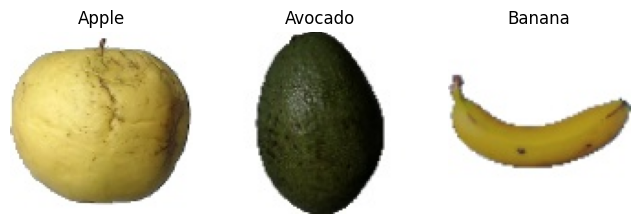

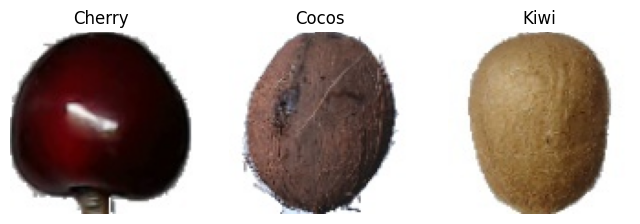

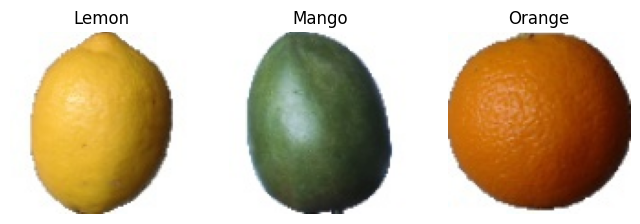

In [49]:
fruits_array_train=[]
for features,label in all_arrays:
    fruits_array_train.append(features)

location=[[1,500,1150],[1500,2000,2500],[3000,3500,4000]]
fruit_names=["Apple","Avocado","Banana","Cherry","Cocos","Kiwi","Lemon","Mango","Orange"]
a=0
b=1
c=2
for i,j,k in location:
    plt.subplots(figsize=(8,8))
    plt.subplot(1,3,1)
    plt.imshow(fruits_array_train[i])
    plt.title(fruit_names[a])
    plt.axis("off")
    plt.subplot(1,3,2)
    plt.imshow(fruits_array_train[j])
    plt.title(fruit_names[b])
    plt.axis("off")
    plt.subplot(1,3,3)
    plt.imshow(fruits_array_train[k])
    plt.title(fruit_names[c])
    plt.axis("off")
    a+=3
    b+=3
    c+=3

In [50]:
import random
random.shuffle(all_arrays)
X_train=[]
Y_train=[]
for features,label in all_arrays:
    X_train.append(features)
    Y_train.append(label)
X_train=np.array(X_train) #arraying
import random
random.shuffle(all_arrays2)
X_test=[]
Y_test=[]
for features,label in all_arrays2:
    X_test.append(features)
    Y_test.append(label)
X_test=np.array(X_test) #arraying

### Normalization and Reshaping

In [51]:
X_train=X_train.reshape(-1,img_size,img_size,3)
X_train=X_train/255
X_test=X_test.reshape(-1,img_size,img_size,3)
X_test=X_test/255
print("shape of X_train= ",X_train.shape)
print("shape of X_test=  ",X_test.shape)

shape of X_train=  (4306, 100, 100, 3)
shape of X_test=   (1445, 100, 100, 3)


### We added RGB scale (Reshapping)

In [52]:
from keras.utils import to_categorical
Y_train=to_categorical(Y_train,num_classes=9)
Y_test=to_categorical(Y_test,num_classes=9)

In [53]:
Y_train.shape

(4306, 9)

In [54]:
X_train.shape

(4306, 100, 100, 3)

In [55]:
from sklearn.model_selection import  train_test_split
x_train,x_val,y_train,y_val=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

In [56]:
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(3,3),padding="Same",activation="relu",input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=16,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.35))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(9,activation="softmax"))
#defining optimizer
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)
#compile the model
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

epochs=10
batch_size=18

In [57]:
datagen=ImageDataGenerator(featurewise_center=False, #set input mean to 0
                           samplewise_center=False,  #set each sample mean to 0
                           featurewise_std_normalization=False, #divide input datas to std
                           samplewise_std_normalization=False,  #divide each datas to own std
                           zca_whitening=False,  #dimension reduction
                           rotation_range=0.5,    #rotate 5 degree
                           zoom_range=0.5,        #zoom in-out 5%
                           width_shift_range=0.5, #shift 5%
                           height_shift_range=0.5,
                           horizontal_flip=False,  #randomly flip images
                           vertical_flip=False,
                           )
datagen.fit(x_train)
#model fitting
history=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),epochs=epochs,
                            validation_data=(x_val,y_val),steps_per_epoch=x_train.shape[0]//batch_size
                           )

Epoch 1/10
191/191 [==============================] - 13s 63ms/step - loss: 1.6373 - accuracy: 0.3433 - val_loss: 0.7884 - val_accuracy: 0.7065
Epoch 2/10
191/191 [==============================] - 11s 59ms/step - loss: 0.6934 - accuracy: 0.7440 - val_loss: 0.7243 - val_accuracy: 0.6671
Epoch 3/10
191/191 [==============================] - 11s 59ms/step - loss: 0.3594 - accuracy: 0.8675 - val_loss: 0.3341 - val_accuracy: 0.8387
Epoch 4/10
191/191 [==============================] - 11s 59ms/step - loss: 0.2779 - accuracy: 0.9025 - val_loss: 0.1630 - val_accuracy: 0.9292
Epoch 5/10
191/191 [==============================] - 11s 59ms/step - loss: 0.2204 - accuracy: 0.9229 - val_loss: 0.0744 - val_accuracy: 0.9722
Epoch 6/10
191/191 [==============================] - 11s 60ms/step - loss: 0.1936 - accuracy: 0.9378 - val_loss: 0.4895 - val_accuracy: 0.8051
Epoch 7/10
191/191 [==============================] - 12s 61ms/step - loss: 0.1893 - accuracy: 0.9393 - val_loss: 0.4265 - val_accuracy:

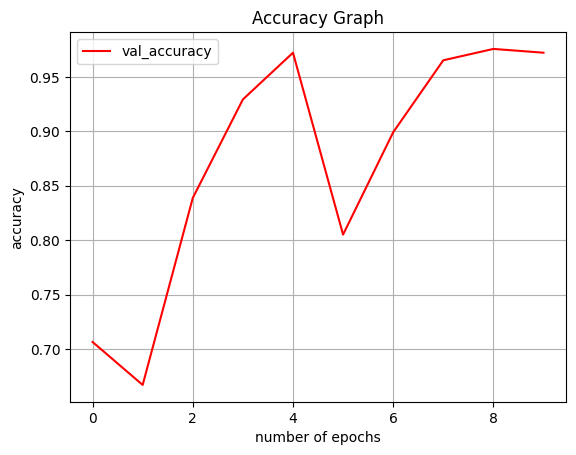

In [59]:
plt.plot(history.history['val_accuracy'], color='r', label='val_accuracy')
plt.title("Accuracy Graph")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

In [60]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### Confusion Matrix

27/27 [==============================] - 1s 23ms/step


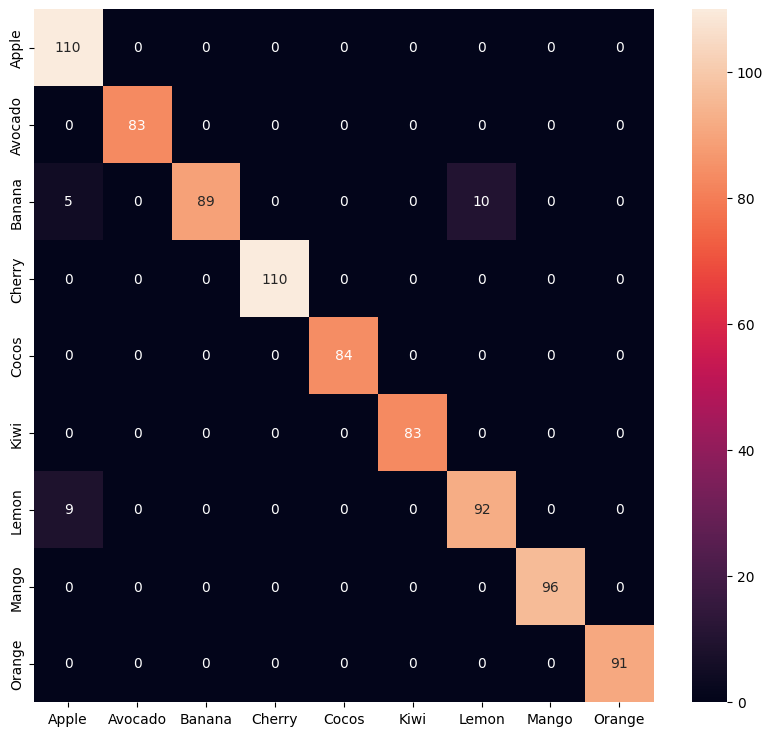

In [61]:
y_pred=model.predict(x_val)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_val,axis=1)
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred_classes)
#plot the con mat
fruit_names=["Apple","Avocado","Banana","Cherry","Cocos","Kiwi","Lemon","Mango","Orange"]
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()

#### We can see error values on validation data

46/46 [==============================] - 1s 21ms/step


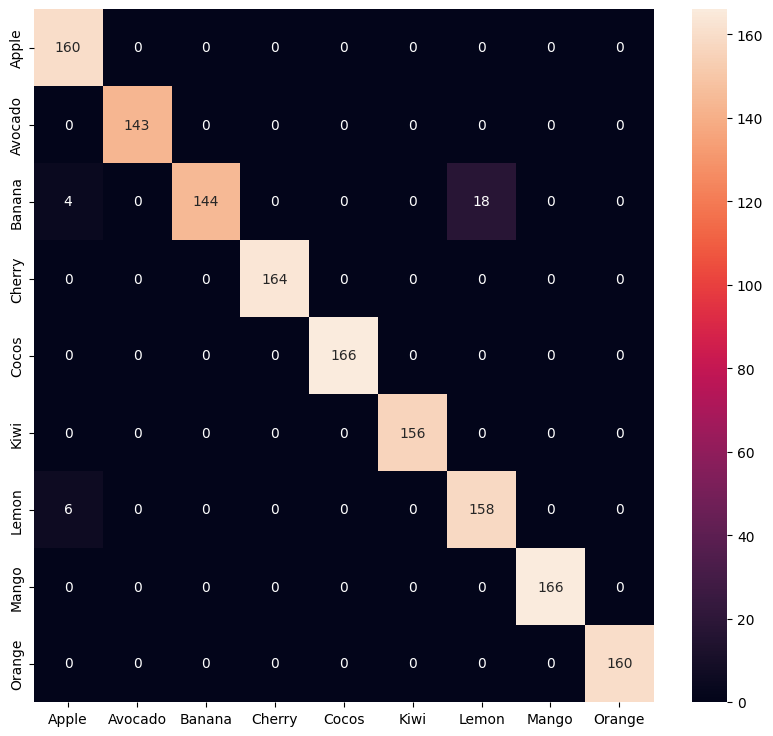

In [62]:
y_pred2=model.predict(X_test)
y_pred_classes2=np.argmax(y_pred2,axis=1)
y_true2=np.argmax(Y_test,axis=1)
#compute conf mat
conf_mat2=confusion_matrix(y_true2,y_pred_classes2)
#plot the con mat
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat2,annot=True,fmt=".0f")
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()

##### In summary, we utilized a CNN approach to evaluate nine different fruit types, primarily focusing on the test data for error analysis. Our model achieved an impressive training accuracy of approximately 95%, which is considered quite satisfactory.